In [2]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pickle
# import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

In [52]:
rename = {"sb": "Small Batch", "lb": "Large Batch", "InvertedPendulum": "Inverted Pendulum"}

def gen_plot(file_prefix, _DEBUG=True):
    files = glob.glob(f"data/{file_prefix}*")
    print(files)
    
    plt.figure()
    experiments = set()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        env_steps = [event.value for event in event_acc.Scalars('Train_EnvstepsSoFar')]
        vals = [event.value for event in event_acc.Scalars('Eval_AverageReturn')]

        lbl = file.split("data\\")[1].split("_CartPole-v0")[0]
        if lbl in experiments:
            continue
        experiments.add(lbl)
        plt.plot(env_steps, vals, label=lbl)
        plt.legend()
        ttl1 = file.split("-v0")[0].split("_")[-1].split(".")[0]
        ttl1 = rename.get(ttl1, ttl1)
        ttl2 = lbl.split('_')[1]
        ttl2 = rename.get(ttl2, ttl2)
        # print(ttl1, ttl2)
        if ttl1 != ttl2: ttl1 += f" ({ttl2})"
        plt.title(ttl1)
    plt.xlabel('Number of Environment Steps')
    plt.ylabel('Average Return')
    plt.show()

['data\\cartpole_sb_CartPole-v0_25-09-2023_01-14-16', 'data\\cartpole_sb_na_CartPole-v0_25-09-2023_01-18-40', 'data\\cartpole_sb_rtg_CartPole-v0_25-09-2023_01-16-21', 'data\\cartpole_sb_rtg_na_CartPole-v0_25-09-2023_01-21-10']
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Actor_Loss', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Initial_DataCollection_AverageReturn'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Actor_Loss', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Initial_DataCo

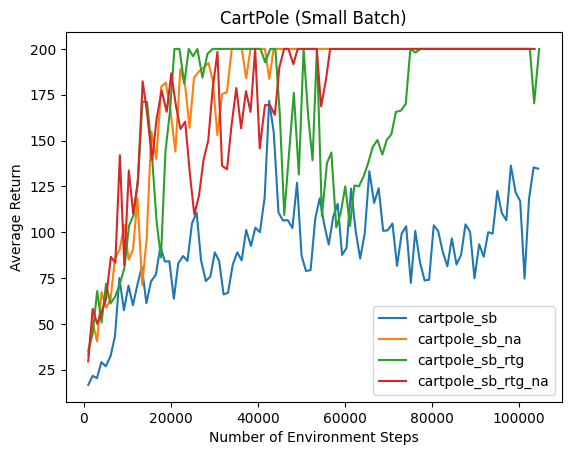

In [53]:
gen_plot("cartpole_sb")

['data\\cartpole_lb_CartPole-v0_25-09-2023_01-23-25', 'data\\cartpole_lb_na_CartPole-v0_25-09-2023_01-47-43', 'data\\cartpole_lb_rtg_CartPole-v0_25-09-2023_01-34-46', 'data\\cartpole_lb_rtg_na_CartPole-v0_25-09-2023_02-02-17']
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Actor_Loss', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Initial_DataCollection_AverageReturn'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Eval_AverageReturn', 'Eval_StdReturn', 'Eval_MaxReturn', 'Eval_MinReturn', 'Eval_AverageEpLen', 'Train_AverageReturn', 'Train_StdReturn', 'Train_MaxReturn', 'Train_MinReturn', 'Train_AverageEpLen', 'Actor_Loss', 'Train_EnvstepsSoFar', 'TimeSinceStart', 'Initial_DataCo

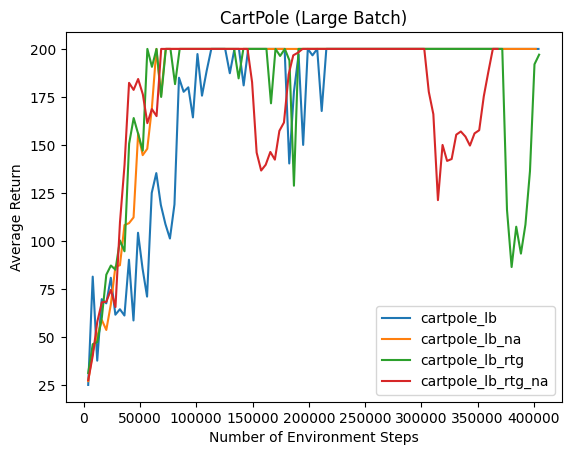

In [60]:
gen_plot("cartpole_lb")

data\cheetah_baseline_decreased_bgs_HalfCheetah-v4_25-09-2023_02-10-42
data\cheetah_baseline_HalfCheetah-v4_25-09-2023_01-41-07
data\cheetah_baseline_na_HalfCheetah-v4_25-09-2023_01-53-23
data\cheetah_HalfCheetah-v4_25-09-2023_01-28-22


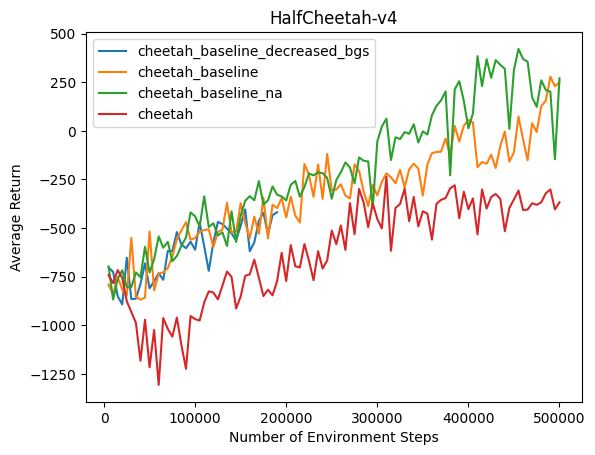

In [59]:
def gen_plot_cheetah(file_prefix, _DEBUG=False):
    files = glob.glob(f"data/{file_prefix}*")
    
    plt.figure()
    experiments = set()
    for file in files:
        # Load the data from the event file.
        print(file)
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        env_steps = [event.value for event in event_acc.Scalars('Train_EnvstepsSoFar')]
        vals = [event.value for event in event_acc.Scalars('Eval_AverageReturn')]

        lbl = file.split("data\\")[1].split("_HalfCheetah")[0]
        if lbl in experiments:
            continue
        experiments.add(lbl)
        plt.plot(env_steps, np.array(vals), label=lbl)
        plt.legend()
        plt.title("HalfCheetah-v4")
    plt.xlabel('Number of Environment Steps')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_cheetah("cheetah")

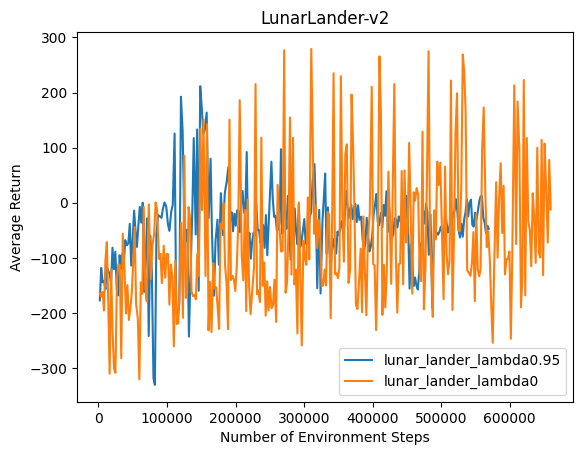

In [58]:
def gen_plot_lunar(file_prefix, _DEBUG=False):
    files = glob.glob(f"data/{file_prefix}*")
    
    plt.figure()
    experiments = set()
    for file in files:
        # Load the data from the event file.
        event_acc = EventAccumulator(file)
        event_acc.Reload()

        if _DEBUG:
            # Show all tags in the log file
            print(event_acc.Tags())

        env_steps = [event.value for event in event_acc.Scalars('Train_EnvstepsSoFar')]
        vals = [event.value for event in event_acc.Scalars('Eval_AverageReturn')]

        lbl = file.split("data\\")[1].split("_LunarLander")[0]
        if lbl in experiments:
            continue
        experiments.add(lbl)
        plt.plot(env_steps, np.array(vals), label=lbl)
        plt.legend()
        plt.title("LunarLander-v2")
    plt.xlabel('Number of Environment Steps')
    plt.ylabel('Average Return')
    plt.show()

gen_plot_lunar("lunar")